# Imports

Import basic libraries and csv files

In [1]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style = 'white')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import PReLU
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
# get data file names
path =r'/content/drive/MyDrive/Feature Collections/4 day timestep'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
data = pd.concat(dfs, ignore_index=True)
data = data.sort_values(by = 'Date')

data

,Unnamed: 0,Date,elevation,forecast_albedo,skin_temperature,surface_solar_radiation_downwards,total_precipitation,snow_acc,snowmelt_calc
380,32,1475280000000,4625,0.567084,274.313625,1.463809e+07,0.006371,0.006376,0.088341
385,41,1475280000000,5063,0.336907,277.856594,1.449688e+07,0.008040,0.008041,0.121260
384,40,1475280000000,4993,0.722119,272.647610,1.589596e+07,0.006098,0.006101,0.051399
383,35,1475280000000,5658,0.423656,275.049384,1.506655e+07,0.010154,0.010154,0.112051
382,34,1475280000000,6112,0.490032,274.207912,1.543651e+07,0.010066,0.010067,0.122657
...,...,...,...,...,...,...,...,...,...
8223,7442,1616803200000,5820,0.851381,260.164746,2.160388e+07,0.001154,0.001154,0.177560
8222,7436,1616803200000,5907,0.858071,261.416455,2.196329e+07,0.001236,0.001236,0.000368
8231,7463,1616803200000,5212,0.851787,258.725293,2.096977e+07,0.000191,0.000191,0.006160
8225,7447,1616803200000,1582,0.159478,281.750358,2.017149e+07,0.000209,0.000209,0.062054


# Data preprocessing

In [4]:
dt = data
# dt = dt[dt['snowmelt_calc']!=0]
dt[['skin_temperature','elevation','surface_solar_radiation_downwards']] = (dt[['skin_temperature','elevation','surface_solar_radiation_downwards']] - dt[['skin_temperature','elevation','surface_solar_radiation_downwards']].min())/(dt[['skin_temperature','elevation','surface_solar_radiation_downwards']].max() - dt[['skin_temperature','elevation','surface_solar_radiation_downwards']].min())
dt.head()

,Unnamed: 0,Date,elevation,forecast_albedo,skin_temperature,surface_solar_radiation_downwards,total_precipitation,snow_acc,snowmelt_calc
380,32,1475280000000,0.671744,0.567084,0.803463,0.575612,0.006371,0.006376,0.088341
385,41,1475280000000,0.768433,0.336907,0.882057,0.568520,0.008040,0.008041,0.121260
384,40,1475280000000,0.752980,0.722119,0.766506,0.638783,0.006098,0.006101,0.051399
383,35,1475280000000,0.899779,0.423656,0.819784,0.597130,0.010154,0.010154,0.112051
382,34,1475280000000,1.000000,0.490032,0.801118,0.615709,0.010066,0.010067,0.122657


In [5]:
X = dt[['skin_temperature','elevation','forecast_albedo','surface_solar_radiation_downwards','total_precipitation','snow_acc']]
y = dt['snowmelt_calc']

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=122,
                                                    shuffle = False)
print("Labels for training and testing data")
print(train_y)
print(test_y)

Labels for training and testing data
380     0.088341
385     0.121260
384     0.051399
383     0.112051
382     0.122657
          ...   
6063    0.022913
6064    0.031395
6065    0.018704
5064    0.000000
5061    0.000000
Name: snowmelt_calc, Length: 5763, dtype: float64
6071    0.007430
6070    0.001471
6069    0.004841
5193    0.000000
6068    0.000272
          ...   
8223    0.177560
8222    0.000368
8231    0.006160
8225    0.062054
8232    0.001224
Name: snowmelt_calc, Length: 2470, dtype: float64


In [6]:
train_X

,skin_temperature,elevation,forecast_albedo,surface_solar_radiation_downwards,total_precipitation,snow_acc
380,0.803463,0.671744,0.567084,0.575612,0.006371,0.006376
385,0.882057,0.768433,0.336907,0.568520,0.008040,0.008041
384,0.766506,0.752980,0.722119,0.638783,0.006098,0.006101
383,0.819784,0.899779,0.423656,0.597130,0.010154,0.010154
382,0.801118,1.000000,0.490032,0.615709,0.010066,0.010067
...,...,...,...,...,...,...
6063,0.644155,0.616556,0.871462,0.160188,0.021792,0.023373
6064,0.680719,0.724503,0.814325,0.137778,0.029111,0.031049
6065,0.731566,0.596909,0.677904,0.124900,0.006811,0.007222
5064,0.516428,0.954746,0.871638,0.289304,0.008347,0.008606


In [7]:
train_X.shape

(5763, 6)

# Model creation and testing

## Model architecture

In [8]:
# from tensorflow.keras.callbacks import ReduceLROnPlateau

# # create and fit the LSTM network
# model = Sequential()
# model.add(Bidirectional(GRU(30),input_shape = (6,1)))
# model.add(PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None))
# model.add(Dense(64,activation = None))
# model.add(PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None))
# model.add(Dense(1,activation = 'gelu'))
# reduce_lr = ReduceLROnPlateau(monitor='loss', mode ='min',factor=0.4,
#                               patience=10, min_lr=0.000000001)
# checkpoint_filepath = '/content/temp/checkpoint'
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=True,
#     monitor='val_root_mean_squared_error',
#     mode='min',
#     save_best_only=True)

# model.compile(loss=tf.keras.losses.MeanSquaredError(),
#               optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0006),
#               metrics=['RootMeanSquaredError'])
# print(model.summary())
# history = model.fit(train_X, train_y,callbacks = [model_checkpoint_callback],validation_split=0.3, epochs=300, verbose=0)
# plt.plot(history.history['root_mean_squared_error'])
# plt.plot(history.history['val_root_mean_squared_error'])
# plt.title('model rmse')
# plt.ylabel('val_rmse')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# print(history.history['root_mean_squared_error'][-1],history.history['val_root_mean_squared_error'][-1])

## Model results and testing

In [9]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Models/4_day_model')

In [10]:
# model.load_weights(checkpoint_filepath)

In [11]:
# Model prediction
temp= model.predict(test_X)
temp[temp<0]=0

#Results Stats
import math
from sklearn.metrics import mean_squared_error # MSE
from sklearn.metrics import mean_absolute_error # MAE
from sklearn.metrics import r2_score#R square

mse = mean_squared_error(test_y,temp)
rmse = math.sqrt(mse)
mae = mean_absolute_error(test_y,temp)
r2 = r2_score(test_y,temp)
norm_rmse = rmse/(float(dt['snowmelt_calc'].max()-dt['snowmelt_calc'].min()))

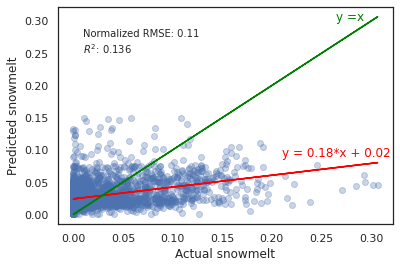

In [12]:
#Visualization of results
plt.scatter(test_y,temp,cmap = 'virdis',alpha = 0.3)
m, b = np.polyfit(test_y, temp, 1)
# Slope and intercept of polyfit line
slope = float(m)
intercept = float(b)

plt.xlabel('Actual snowmelt')
plt.ylabel('Predicted snowmelt')
plt.plot(test_y, m*test_y + b,color = 'red')
plt.plot(test_y, 1*test_y + 0,color = 'green')
plt.text(0.01,0.25, 'Normalized RMSE: '+str(np.round(norm_rmse,4))+'\n$R^2$: '+str(np.round(r2,3)))
plt.text(0.21,0.09, 'y = '+str(round(slope,2))+'*x + '+str(round(intercept,2)),color = 'red',fontsize = 12)
plt.text(0.265,0.3, 'y =x',fontsize = 12,color = 'green')
plt.savefig('4_day_graph.tif',dpi = 300)
plt.show()

In [13]:
print('MSE:',mse,'\nRMSE:',rmse,'\nMAE:',mae,'\nR2:',r2,'\nNormalized RMSE:',norm_rmse,'\nSlope:',m,'\nIntercept:',b)

MSE: 0.0017021099934764231 
RMSE: 0.04125663575082708 
MAE: 0.028713444642312944 
R2: 0.1357259340147754 
Normalized RMSE: 0.11003384491556048 
Slope: [0.18361557] 
Intercept: [0.02404343]


In [14]:
# model.save('/content/drive/MyDrive/Models/4_day_model')